<h3 style="text-align: center">Linear regression with PyTorch</h3>

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

<p>Least square sum</p>

$
m=\frac { \overline { xy } -\overline { x } \cdot \overline { y }  }{ \overline { xx } -\overline { x } \cdot \overline { x }  } \\ 
m=\frac { \overline { xy } -\overline { x } \cdot \overline { y }  }{ \overline { { x }^{ 2 } } -     { \left( \overline { x }  \right)  }^{ 2 } }\quad
$

$
point\quad (\overline { x } ,\overline { y } )\quad \in \quad regression\quad line,\quad\\
\overline { x } ,\overline { y } \quad are\quad means(averages)\quad of\quad x, y\quad values
$

so

$
b=\overline { y } -m\overline { x }\quad
$


Least square sum with numpy

m(slope)= 1.3121387283236994 n(y-intercept)= 3.011560693641619


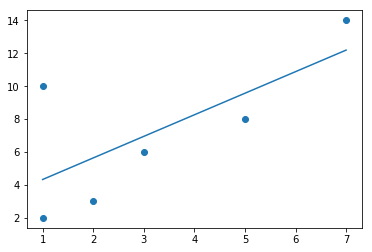

In [2]:
class reg_lin:
    def __init__(self,data):
        self.data = data
        self.line()

    def line(self):
        #transpose data
        x, y = self.data.T

        xy = np.multiply(x,y)
        xx = np.multiply(x,x)

        x_m = np.mean(x)
        y_m = np.mean(y)
        xy_m = np.mean(xy)
        xx_m = np.mean(xx)

        m = (xy_m - x_m * y_m )/(xx_m - x_m * x_m)
        n = y_m - m * x_m

        self.m = m
        self.n = n

        return(m,n)
    
data = np.array([
    [1, 2],
    [1,10],
    [2, 3],
    [3, 6],
    [5, 8],
    [7, 14]
])

x, y = data.T

plt.scatter(x,y)

line=reg_lin(data)
m=line.m
n=line.n
print("m(slope)=",m,"n(y-intercept)=",n)  

plt.plot(x, m*x+n)

plt.show()

Least square sum with pytorch

In [3]:
points = torch.from_numpy(data)
#mean_x_y = torch.mean(points.float(),dim=0)
X = points[:,0:1].float()
Y = points[:,1:2].float()

m = (torch.mean(X*Y)-torch.mean(X)*torch.mean(Y))/(torch.mean(X*X)-torch.mean(X)*torch.mean(X))
b = torch.mean(Y) - m* torch.mean(X)
print("m(slope)=",m,"n(y-intercept)=",n)

m(slope)= tensor(1.3121) n(y-intercept)= 3.011560693641619


Gradients with pytorch

loss= tensor(51.1910, dtype=torch.float64, grad_fn=<SumBackward0>)
m(slope)= 1.3146310101366392 n(y-intercept)= 3.0001299548341285


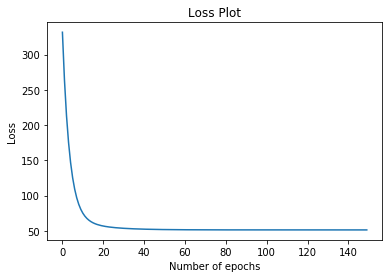

In [16]:
m = Variable(torch.randn(1, 1, dtype=torch.double), requires_grad=True)
n = Variable(torch.randn(1, 1, dtype=torch.double), requires_grad=True)

X = points[:,0:1].double()
Y = points[:,1:2].double()

alpha = 0.01
epochs = 150

lossHistory = []

for i in range(epochs):
    prediction = m*X + n
    loss = torch.sum((prediction - Y)**2)
    
    lossHistory.append(loss)
    
    loss.backward()
      
    with torch.no_grad():
        m -= alpha * m.grad
        n -= alpha * n.grad

        # Manually zero the gradients after updating weights
        m.grad.zero_()
        n.grad.zero_()

print("loss=",loss)  
print("m(slope)=",m[0][0].data.numpy(),"n(y-intercept)=",n[0][0].data.numpy())

# Plotting the loss (error)
plt.title("Loss Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(lossHistory)
plt.show() 

Pytorch - predefined Linear model

In [5]:
#alpha = 2; beta=3
#x = np.linspace(0, 4, 100)
#y = alpha * x + beta + np.random.randn(100) * 0.3
#print(x)
x = x.reshape(-1,1) # convert to column vectors
y = y.reshape(-1,1)

class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegressionModel(input_dim=1, output_dim=1)  

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

inputs = Variable(torch.from_numpy(x.astype('float32')))
labels = Variable(torch.from_numpy(y.astype('float32')))

list(model.named_parameters())

[('linear.weight', Parameter containing:
  tensor([[0.9793]], requires_grad=True)),
 ('linear.bias', Parameter containing:
  tensor([-0.5090], requires_grad=True))]

In [31]:
for epoch in range(500):
    #1. clear gradients w.r.t. parameters
    optimizer.zero_grad()
    #2. forward to get output
    outputs = model(inputs)
    #3 calculate loss (scalar value)
    loss = criterion(outputs, labels)
    #4 calculate gradients w.r.t. parmanters
    loss.backward()
    #5 updating parameters
    optimizer.step()
    
#inspect learned parameters
#result = list(model.named_parameters()) 
#print(result)
print("loss:",loss.data.numpy())

#inspect network modules/layers
#for idx, m in enumerate(model.named_modules()):
#    print(idx, '->', m)
    
#inspect weight and bias
m = model.linear.weight.data.numpy()[0][0]
b = model.linear.bias.data.numpy()[0]
print("m(slope)=",m,"n(y-intercept)=",b)

loss: 8.531793
m(slope)= 1.3121432 n(y-intercept)= 3.0115407


m(slope)= 1.3123626 b(y-intercept)= 3.010534


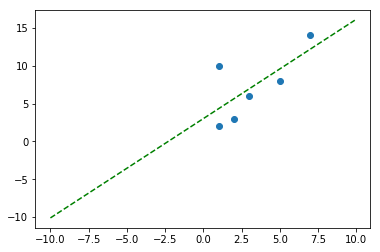

In [20]:
def display(m, b, color='g--'):
    xmin = 0; xmax = 4
    ymin = 0; ymax = 12
    more = 1
    #plt.xlim(-0.05,1.05)
    #plt.ylim(-0.05,1.05)
    #plt.xlim(xmin-more,xmax+more)
    #plt.ylim(ymin-more,ymax+more)    
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color,zorder=1)


print("m(slope)=",m,"b(y-intercept)=",b)    
plt.scatter(x,y)
display(m,b)
plt.show()